In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel 
import pandas as pd

## Spherical core 

*BlockCopolymerMicelle*

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_BlockCopolymerMicelle.c

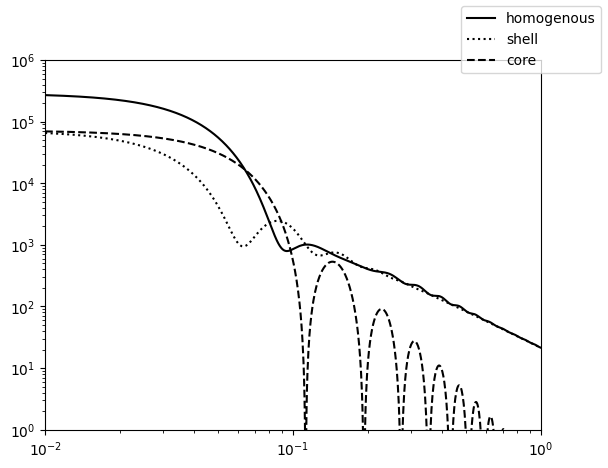

In [20]:
files = ["01_sphere_homogenous", "01_sphere_shell", "01_sphere_core"]
labels =['homogenous', 'shell', 'core']
linestyles = ['solid','dotted','dashed' ]
fig, ax = plt.subplots()
for i  in range(3):
    data_sasfit = pd.read_csv("./SASFit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq = data_sasfit.iloc[:,1]
    ax.loglog(q, Iq, label=labels[i], ls=linestyles[i], color='k')
    ax.set_ylim([1e0, 1e6])
    ax.set_xlim([1e-2, 1e0])
fig.legend()
plt.show()

## Cylinder ()

*CYL+Chains(RW)_Rc* 
https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/cyl_rwbrush/sasfit_ff_cyl_rwbrush_rc.c

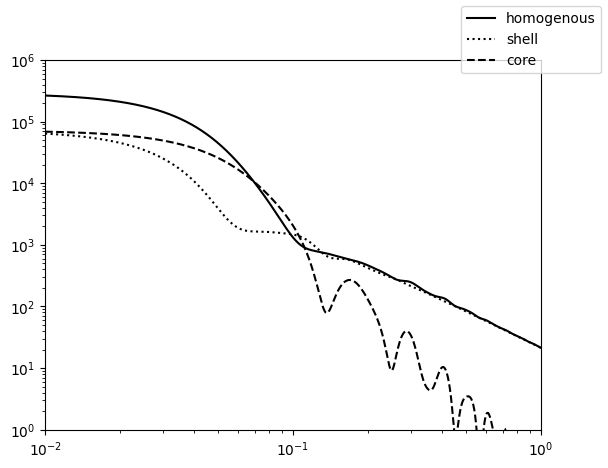

In [23]:
files = ["02_cylinder_homogenous", "02_cylinder_shell", "02_cylinder_core"]
labels =['homogenous', 'shell', 'core']
linestyles = ['solid','dotted','dashed' ]
fig, ax = plt.subplots()
for i  in range(3):
    data_sasfit = pd.read_csv("./SASFit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq = data_sasfit.iloc[:,1]
    ax.loglog(q, Iq, label=labels[i], ls=linestyles[i], color='k')
    ax.set_ylim([1e0, 1e6])
    ax.set_xlim([1e-2, 1e0])
fig.legend()
plt.show()

## Long cylinder or Rod 

*ROD+Chains(RW)_Rc* 

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_Rod_RWbrush.c

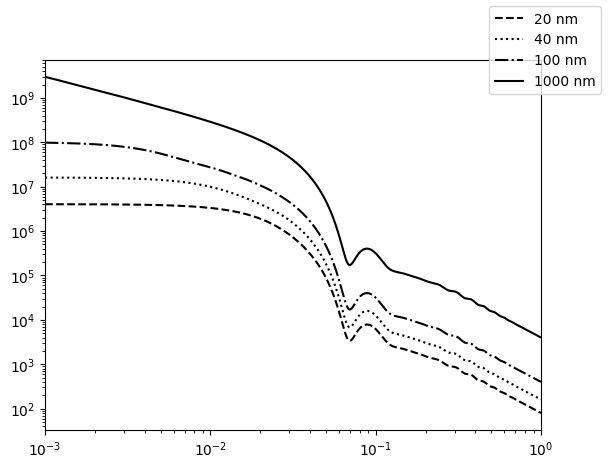

In [27]:
files = ["03_longrod_20nm", "03_longrod_40nm", "03_longrod_100nm", "03_longrod_1000nm"]
linestyles = ['dashed','dotted','dashdot', 'solid']
labels = [20, 40, 100, 1000]
fig, ax = plt.subplots()
for i  in range(4):
    data_sasfit = pd.read_csv("./SASFit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq = data_sasfit.iloc[:,1]
    ax.loglog(q, Iq, label="%d nm"%labels[i], ls=linestyles[i], color='k')
    ax.set_xlim([1e-3, 1e0])
fig.legend()
plt.show()